In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf

2022-11-30 19:48:00.566339: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#dataset = read_csv("folder/subfolder/dataToModel.csv",index_col= 0,sep=";")
dataset = read_csv("folder/subfolder/dataToModel_5min.csv",index_col= 0,sep=";")


In [5]:
dataset.head()

,rok,ms,dz,go,fco2_MQ,fco2_HQ,fco2_raw,glwody,T50cm,T2m,...,Ku,Ld,Lu,ppp,v,vdir,Tgrunt,vwc,PARd,PARu
1308,2013,1,5,13,-0.41,0.0,-0.41,4.7,0.6,0.3,...,1.8,309.6,316.7,1002.9,4.2,337.3,0.6,0.788,54.1,2.6
1309,2013,1,5,13,0.69,0.0,0.69,4.7,0.6,0.3,...,2.2,309.3,316.8,1002.9,4.8,337.8,0.6,0.788,65.9,3.1
1310,2013,1,5,13,0.51,0.0,0.51,4.7,0.6,0.3,...,1.6,310.0,316.7,1002.8,5.4,337.8,0.6,0.788,49.7,2.4
1311,2013,1,5,13,NaN,0.0,0.17,4.7,0.6,0.4,...,2.3,309.4,316.8,1002.7,5.1,333.1,0.7,0.788,67.2,3.3
1312,2013,1,5,13,1.23,0.0,1.23,4.7,0.6,0.3,...,2.0,309.1,316.7,1002.5,4.9,334.9,0.7,0.788,59.4,2.9


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475336 entries, 1308 to 105407
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   rok       475336 non-null  int64  
 1   ms        475336 non-null  int64  
 2   dz        475336 non-null  int64  
 3   go        475336 non-null  int64  
 4   fco2_MQ   298211 non-null  float64
 5   fco2_HQ   475336 non-null  float64
 6   fco2_raw  475336 non-null  float64
 7   glwody    475336 non-null  float64
 8   T50cm     475336 non-null  float64
 9   T2m       475336 non-null  float64
 10  Kd        475336 non-null  float64
 11  Ku        475336 non-null  float64
 12  Ld        475336 non-null  float64
 13  Lu        475336 non-null  float64
 14  ppp       475336 non-null  float64
 15  v         475336 non-null  float64
 16  vdir      475336 non-null  float64
 17  Tgrunt    475336 non-null  float64
 18  vwc       475336 non-null  float64
 19  PARd      475336 non-null  float64
 20  P

In [7]:
#dataset.drop(columns  = ['dz','godz','ms','fco2_MQ','rok'], inplace = True)
dataset.drop(columns  = ['dz','go','ms','dz','fco2_MQ','rok'], inplace = True)

In [8]:
dataset.head(2220)

,fco2_HQ,fco2_raw,glwody,T50cm,T2m,Kd,Ku,Ld,Lu,ppp,v,vdir,Tgrunt,vwc,PARd,PARu
1308,0.0,-0.41,4.7,0.6,0.3,25.6,1.8,309.6,316.7,1002.9,4.2,337.3,0.6,0.788,54.1,2.6
1309,0.0,0.69,4.7,0.6,0.3,31.7,2.2,309.3,316.8,1002.9,4.8,337.8,0.6,0.788,65.9,3.1
1310,0.0,0.51,4.7,0.6,0.3,23.5,1.6,310.0,316.7,1002.8,5.4,337.8,0.6,0.788,49.7,2.4
1311,0.0,0.17,4.7,0.6,0.4,32.6,2.3,309.4,316.8,1002.7,5.1,333.1,0.7,0.788,67.2,3.3
1312,0.0,1.23,4.7,0.6,0.3,28.5,2.0,309.1,316.7,1002.5,4.9,334.9,0.7,0.788,59.4,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22231,1.0,0.41,4.4,-6.3,-6.3,0.0,0.4,258.5,286.3,989.8,5.3,77.7,0.6,0.675,0.5,0.2
22232,1.0,0.39,4.4,-6.3,-6.3,0.0,0.4,259.3,286.4,990.0,5.8,80.4,0.6,0.675,0.8,0.3
22233,1.0,0.45,4.4,-6.3,-6.2,0.0,0.4,259.7,286.4,990.2,5.8,80.8,0.6,0.675,1.3,0.5
22234,1.0,0.58,4.4,-6.2,-6.2,0.0,0.4,260.2,286.5,990.4,5.9,80.3,0.6,0.675,1.6,0.6


In [9]:
values = dataset.values
values = values.astype('float64')

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled = pd.DataFrame(scaled)

In [11]:
scaled.head(2220)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.491578,0.864865,0.400347,0.402135,0.021455,0.003073,0.508166,0.326026,0.542022,0.344262,0.936944,0.045045,0.800357,0.024668,0.001744
1,0.0,0.492158,0.864865,0.400347,0.402135,0.026567,0.003756,0.507224,0.326339,0.542022,0.393443,0.938333,0.045045,0.800357,0.030049,0.002080
2,0.0,0.492063,0.864865,0.400347,0.402135,0.019695,0.002732,0.509422,0.326026,0.540804,0.442623,0.938333,0.045045,0.800357,0.022662,0.001610
3,0.0,0.491884,0.864865,0.400347,0.403915,0.027321,0.003927,0.507538,0.326339,0.539586,0.418033,0.925278,0.049550,0.800357,0.030642,0.002214
4,0.0,0.492442,0.864865,0.400347,0.402135,0.023885,0.003415,0.506595,0.326026,0.537150,0.401639,0.930278,0.049550,0.800357,0.027085,0.001945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,1.0,0.492010,0.862069,0.280763,0.284698,0.000000,0.000683,0.347676,0.230817,0.382460,0.434426,0.215833,0.045045,0.598930,0.000228,0.000134
2216,1.0,0.492000,0.862069,0.280763,0.284698,0.000000,0.000683,0.350188,0.231131,0.384896,0.475410,0.223333,0.045045,0.598930,0.000365,0.000201
2217,1.0,0.492031,0.862069,0.280763,0.286477,0.000000,0.000683,0.351445,0.231131,0.387333,0.475410,0.224444,0.045045,0.598930,0.000593,0.000335
2218,1.0,0.492100,0.862069,0.282496,0.286477,0.000000,0.000683,0.353015,0.231444,0.389769,0.483607,0.223056,0.045045,0.598930,0.000730,0.000402


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475336 entries, 1308 to 105407
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   fco2_HQ   475336 non-null  float64
 1   fco2_raw  475336 non-null  float64
 2   glwody    475336 non-null  float64
 3   T50cm     475336 non-null  float64
 4   T2m       475336 non-null  float64
 5   Kd        475336 non-null  float64
 6   Ku        475336 non-null  float64
 7   Ld        475336 non-null  float64
 8   Lu        475336 non-null  float64
 9   ppp       475336 non-null  float64
 10  v         475336 non-null  float64
 11  vdir      475336 non-null  float64
 12  Tgrunt    475336 non-null  float64
 13  vwc       475336 non-null  float64
 14  PARd      475336 non-null  float64
 15  PARu      475336 non-null  float64
dtypes: float64(16)
memory usage: 61.7 MB


In [13]:
dataset.shape

(475336, 16)

In [14]:
list0 = []
list1 = []
i=0
w=6
for window in scaled.rolling(window=w):
   # print(window.shape)
    if(window.shape==(w,window.shape[1])):
        i+=1
       # print("Number of window "+ str(i))
        list0.append(np.asarray(window.copy()))
        y=0
        shape = window.shape
        for index, test in window.iterrows() :
           # print(y)
            if (y==w-1) :
               # print(test[0])
                list1.append(test[0])
                agroup=test[0]
            y+=1

In [15]:
#print(list0)

In [16]:
dataFromSensors=np.array(list0)

In [17]:
#print(dataFromSensors)

In [18]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475331, 6, 16)
strides:  (768, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x7fde45f00000
byteorder:  little
byteswap:  False
type: float64


In [19]:
#print(list1)

In [20]:
labels=np.array(list1)

In [21]:
#print(labels)

In [22]:
np.info(labels)

class:  ndarray
shape:  (475331,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7fdea1046000
byteorder:  little
byteswap:  False
type: float64


In [23]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [24]:
training_sample_labels

380264

In [25]:
training_sample

380264

In [26]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [27]:
train_X.shape

(380264, 6, 15)

In [28]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
#print(train_X)

In [30]:
train_y.shape

(380264,)

In [31]:
#print(test_y)

In [32]:
train_y=train_y.reshape(train_y.shape[0],1)

In [33]:
test_y=test_y.reshape(test_y.shape[0],1)

In [34]:
#print(train_X)

In [35]:
# reshape input to be 3D [samples, time steps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1], train_X.shape[2]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1], test_X.shape[2]))



print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380264, 6, 15) (380264, 1) (95067, 6, 15) (95067, 1)


In [87]:
model_gru =  keras.models.Sequential([
   # keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, input_shape=(train_X.shape[1], train_X.shape[2])),
    keras.layers.GRU(200,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2]),activation='relu'),
    #keras.layers.Flatten(),
   # keras.layers.GRU(units=128,return_sequences=True),
    #keras.layers.GRU(units=64,return_sequences=True,activation='relu'),
    #keras.layers.GRU(units=1,return_sequences=True),
    #keras.layers.Flatten(),
    
    keras.layers.GRU(units=100,return_sequences=True,activation='relu'),
    keras.layers.GRU(units=50,activation='relu'),
    #keras.layers.Flatten(),
    #keras.layers.BatchNormalization(),
   #
  #  keras.layers.GRU(units=3),
 
    #keras.layers.TimeDistributed(keras.layers.Dense(units=36))
    #keras.layers.TimeDistributed(keras.layers.Dense(1))
    keras.layers.Dense(units=60,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [88]:
model_gru.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 6, 200)            130200    
                                                                 
 gru_13 (GRU)                (None, 6, 100)            90600     
                                                                 
 gru_14 (GRU)                (None, 50)                22800     
                                                                 
 dense_8 (Dense)             (None, 60)                3060      
                                                                 
 dense_9 (Dense)             (None, 1)                 61        
                                                                 
Total params: 246,721
Trainable params: 246,721
Non-trainable params: 0
_________________________________________________________________


In [89]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=5,validation_data=(test_X, test_y), batch_size=64)#, shuffle=False)

Epoch 1/5
5942/5942 [==============================] - 240s 39ms/step - loss: 0.4629 - accuracy: 0.7649 - val_loss: 0.4374 - val_accuracy: 0.7791
Epoch 2/5
5942/5942 [==============================] - 224s 38ms/step - loss: 0.4418 - accuracy: 0.7757 - val_loss: 0.4316 - val_accuracy: 0.7790
Epoch 3/5
5942/5942 [==============================] - 194s 33ms/step - loss: 0.4366 - accuracy: 0.7786 - val_loss: 0.4328 - val_accuracy: 0.7778
Epoch 4/5
5942/5942 [==============================] - 206s 35ms/step - loss: 0.4331 - accuracy: 0.7801 - val_loss: 0.4288 - val_accuracy: 0.7836
Epoch 5/5
5942/5942 [==============================] - 218s 37ms/step - loss: 0.4306 - accuracy: 0.7814 - val_loss: 0.4284 - val_accuracy: 0.7839


In [90]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 22s 7ms/step


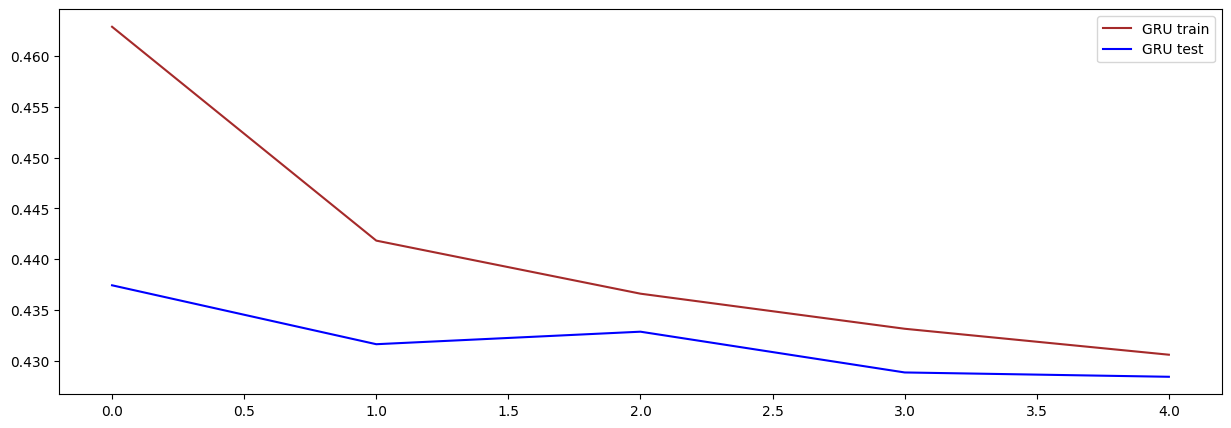

In [91]:
#dont run this cell if you are running this cell than add "validation_data=(test_X, test_y)" in model_gru.fit()
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [92]:
#test_y.reshape(8086,1)
#test_y.reshape(2627,1)
#test_y=test_y[:, :1]

#train_y=test_y[:, :1]
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [93]:
np.shape(pred_y)

(95067, 1)

In [94]:
pred_y

array([[0.0009333 ],
       [0.0016634 ],
       [0.00316148],
       ...,
       [0.07513297],
       [0.07539569],
       [0.07610858]], dtype=float32)

In [95]:
#pred_y=np.reshape(pred_y,8068)
pred_y=np.reshape(pred_y,95067)

0.14314067459456825
0.23026699570622067
0.37833936432066945
0.2895894780635833


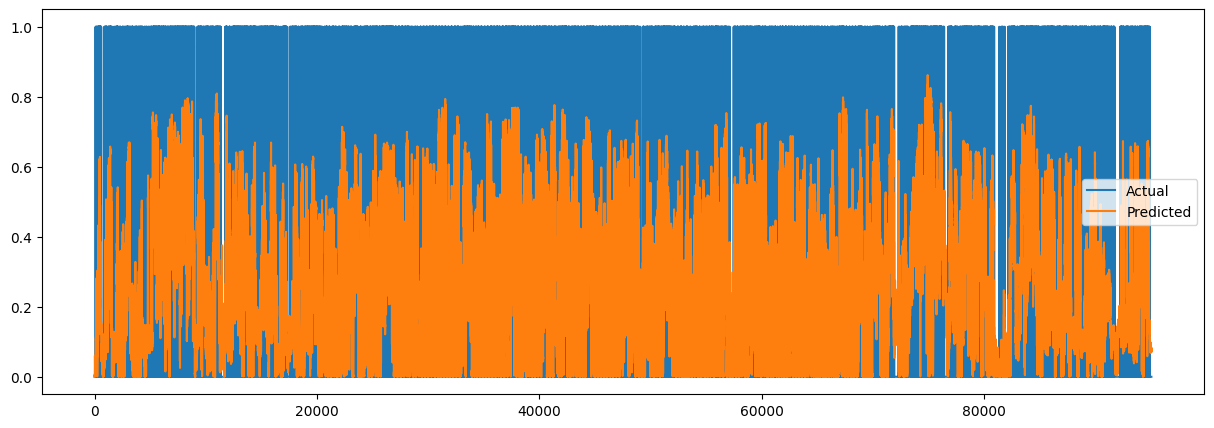

In [96]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)

#plotting predicted test value vs actual test value
plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [97]:
np.shape(train_X)

(380264, 6, 15)

In [98]:
np.shape(train_y)

(380264, 1)

In [99]:
np.shape(test_X)

(95067, 6, 15)

In [100]:
np.shape(test_y)

(95067, 1)

14855/14855 [==============================] - 110s 7ms/step


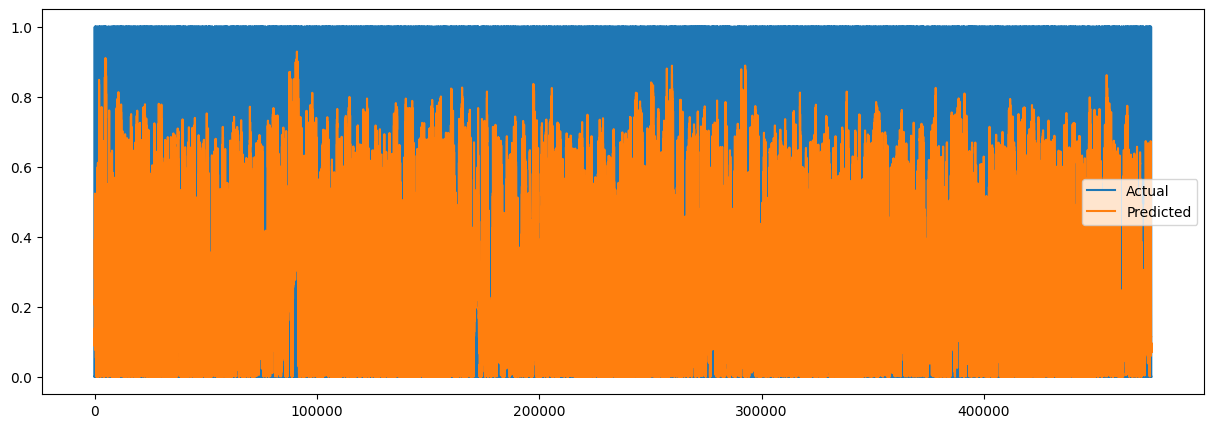

In [101]:
#visualization over full data
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

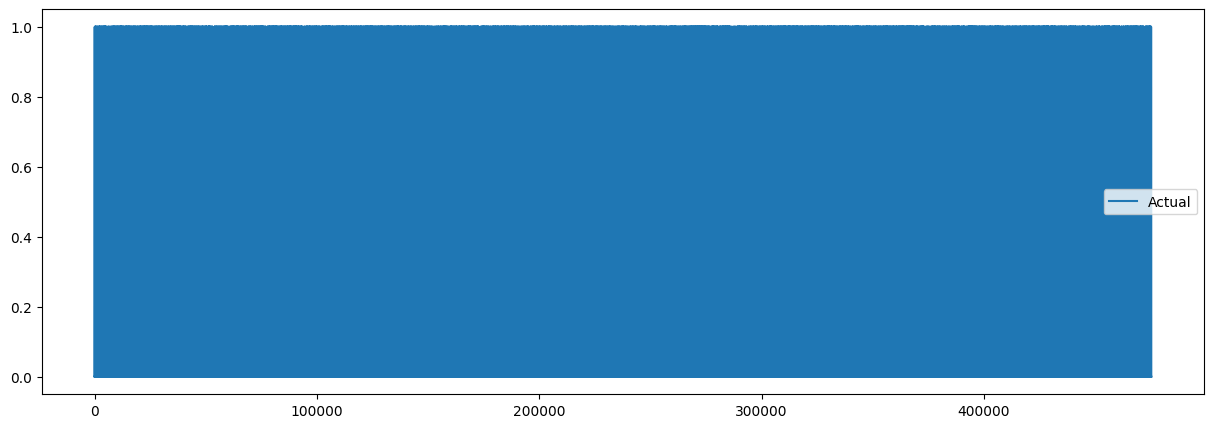

In [102]:
#over small part of data
plt.plot(tes, label = 'Actual')
#plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [103]:
print(sum(tes)/len(tes))

[0.25794026]


In [104]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.62504183]
[0.81379628]
total acc [0.78294073]


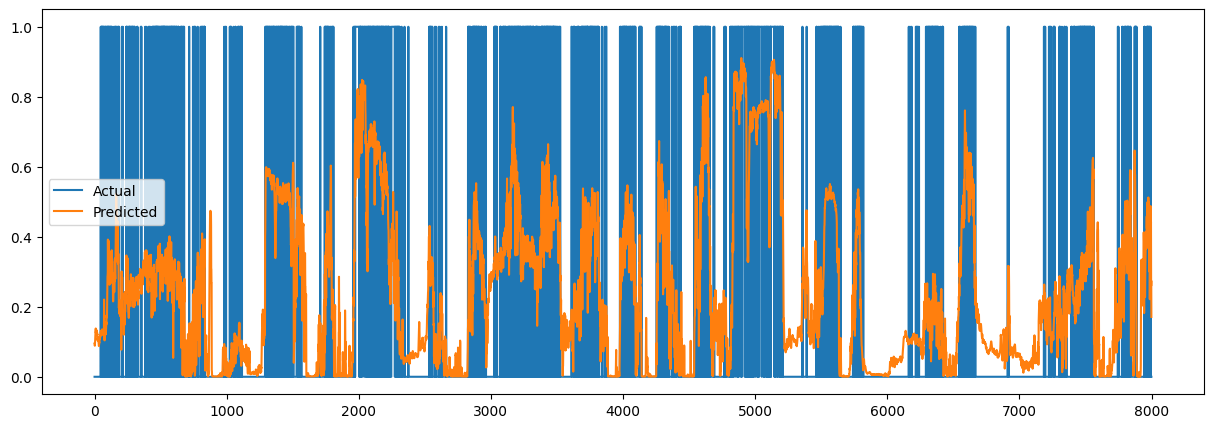

In [105]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

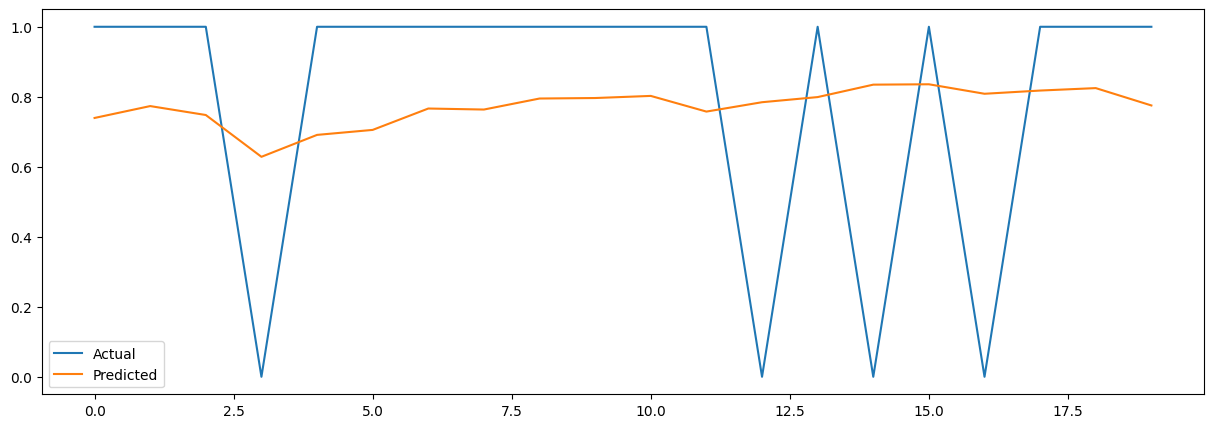

In [106]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

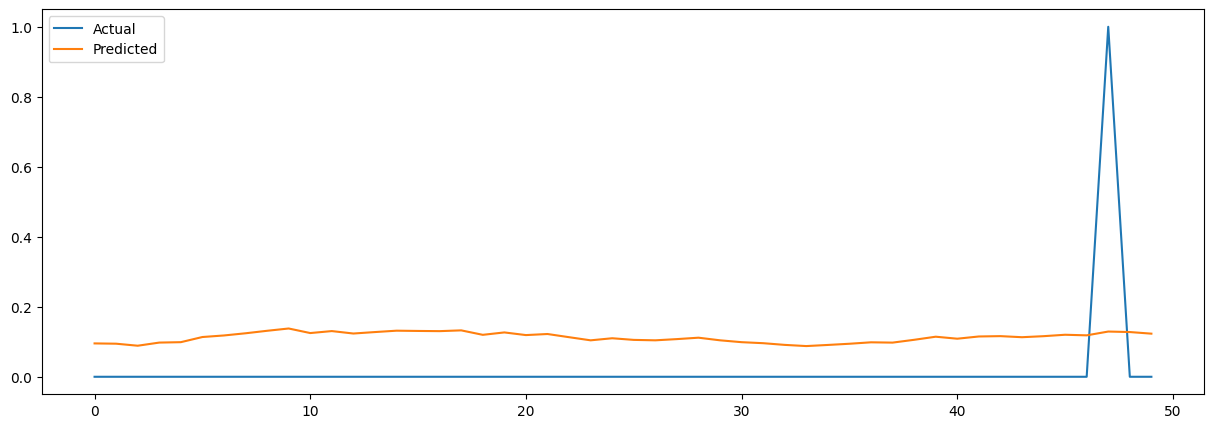

In [107]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

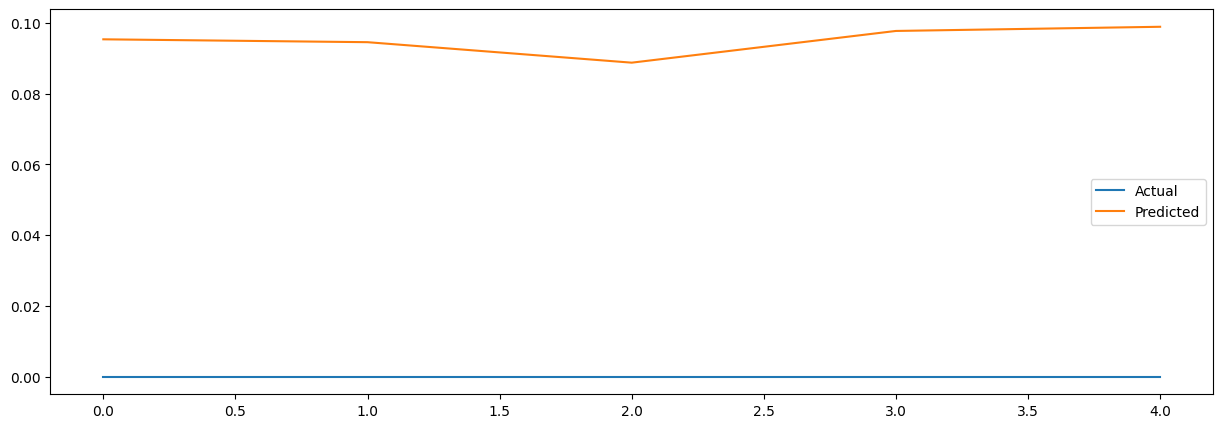

In [108]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

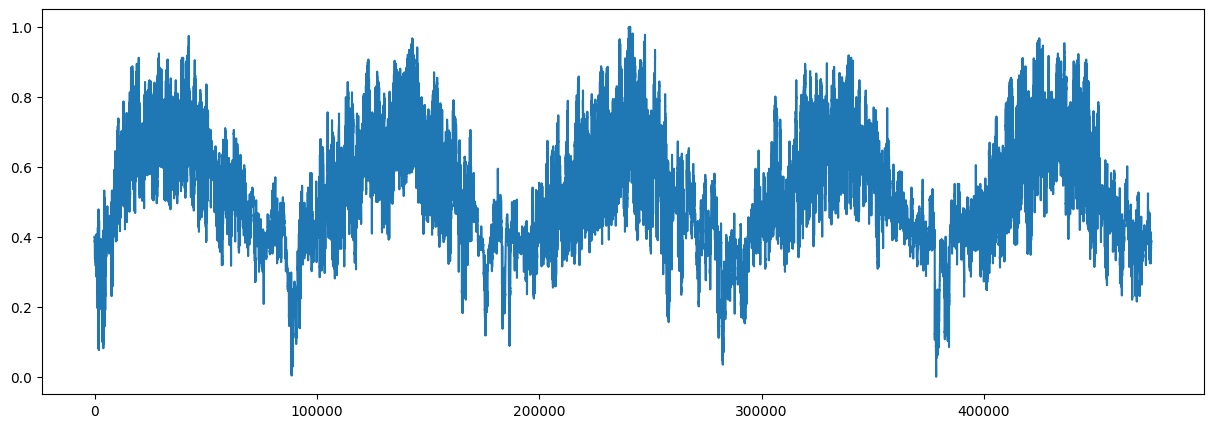

In [109]:
plt.plot(scaled[3], label = 'Actual')

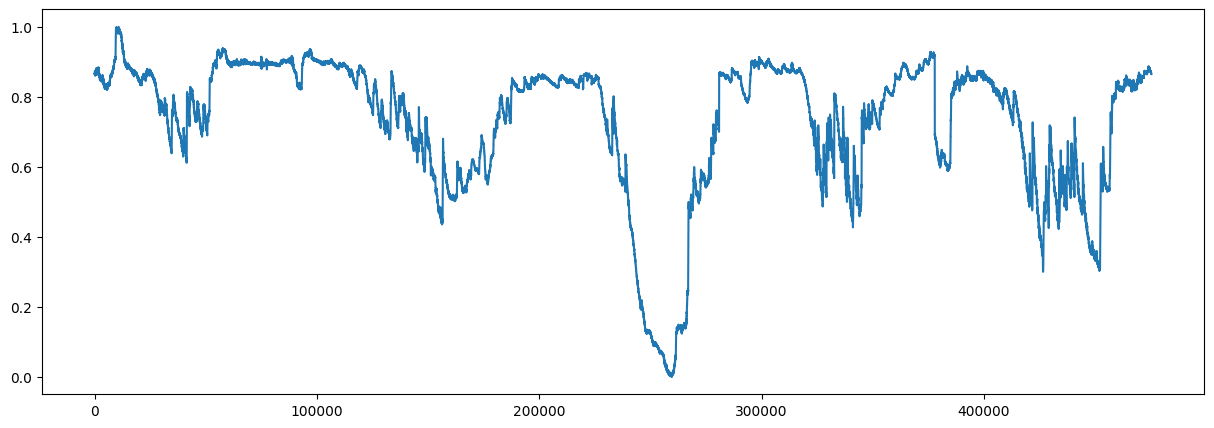

In [110]:
plt.plot(scaled[2], label = 'Actual')

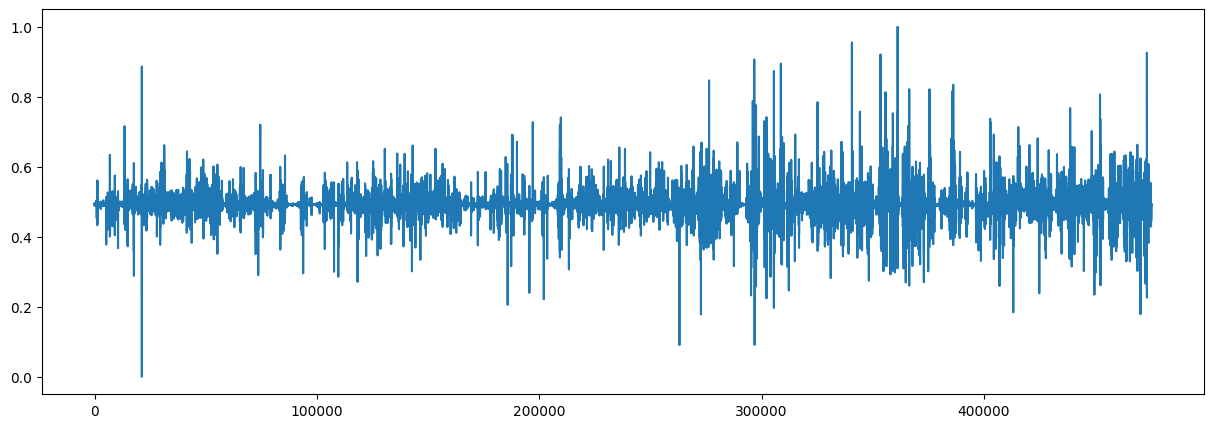

In [111]:
plt.plot(scaled[1], label = 'Actual')

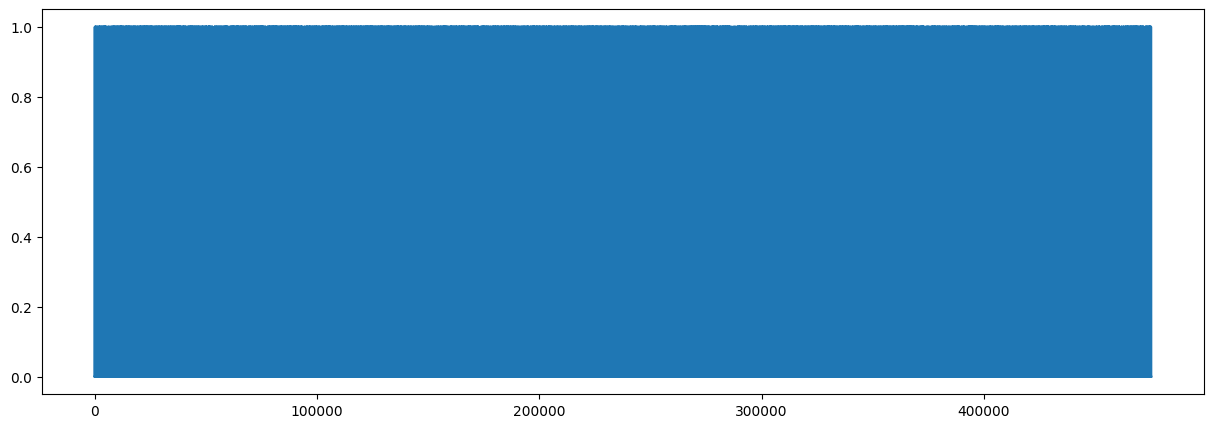

In [112]:
plt.plot(scaled[0], label = 'Actual')